![Image of Yaktocat](https://pbs.twimg.com/profile_images/811501827363520512/zhuGojAu_400x400.jpg)

# Learning objectives

* Reading and writing files in python
* Counting frequencies of words
* Understand what stop words and n-grams are, and there use cases in NLP.



# The premise

Lets imagine that we're interested in getting a programming job in Hong Kong. Some of the questions that come to mind when finding a job are:

* What programming languages are most in demand?

In this lesson I will try to equipped you with some of the skills you would need to approach these questions in a data driven way. We will start with the premise that we already have the data set, which in this case is are job descriptions from different websites such as, jobsdb, indeed, jobable, etc.

## Reading files

The first argument is the location of the file, the second is what mode you want to open the file in. We'll open the file in readmode, and then we'll cover the other mode's later.


In [312]:
filehandle = open('data/quick-fox.txt','r')
text = filehandle.read()

In [313]:
print(text)

The quick brown fox jumps over the lazy dog.


Once the content of a file handle has been read, calling ```read``` again will return an empty string.

In [323]:
with open('data/A.txt','w')as fh:
    fh.write('Hello world')
with open('data/A.txt','r') as fh1:
    data = fh1.read()
with open('data/B.txt','w') as fh2:
    fh2.write(data)
with open('data/B.txt','r') as fh3:
    print(fh3.read())

Hello world


In [271]:
filehandle.read()

''

Once you've finished with a file handle make sure you close it. This is important when writing python scripts since the file's contents will only be edited/removed/saved after you close your file handle.

In [272]:
filehandle.close()

In case you forget to close the file handle, python offers an alternative syntax which automatically handles the closing for you. As you can see below, the alternative 

```python

with open("filename", "r") as filehandle:
    text = filehandle.read()
    

```

Since this syntax handles the closing for us well use it from here foward.

In [55]:
with open('data/quick-fox.txt','r') as fh:
    text = fh.readlines()
    print(text)

['The quick brown fox jumps over the lazy dog.']


In [273]:
fh.closed #Closes automatically

True

As you can see, the syntax below doesn't automatically close the file handle for us. 

In [274]:
fh = open('data/quick-fox.txt','r')
fh.read()

'The quick brown fox jumps over the lazy dog.'

In [275]:
fh.closed #Didn't close automatically

False

In [276]:
fh.close() #Close file handle manually

```readlines``` can be use to read each line into a list.

In [278]:
fh = open('data/zen_of_python.txt','r')
l = fh.readlines()

In [63]:
fh.close()

In some cases when a file is especially large you don't want to read the whole file into memory all at once. In such cases you can use ```readline```. Each time it is called it will read a single line from the file till the end.

In [4]:
with open('data/zen_of_python.txt','r') as fh:
    text = fh.readline()
    print(text)

Beautiful is better than ugly.



You can also specifiy the number of characters to read 

In [5]:
with open('data/zen_of_python.txt','r') as fh:
    text = fh.readline(10)
    print(text)

Beautiful 


# Writing File and other modes

There are a few different modes to open a file with but the most common are:

* 'r' – Read mode as we've just seen
* 'w' – Write mode (existing file with the same name will be erased when this mode is activated)
* 'a' – Append mode, this is used to add new data to the end of the file; that is new information is automatically amended to the end 
* 'r+' –  Read and write mode
* 'a+' - Read and append mode.

An example of writing to a file is below.

```python
with open('filename','w') as filehandle:
    filehandle.write("String you want to write to file")
```    


If I write to the same filename twice in 'w' mode what will be it's contents?

In [6]:
with open('data/file.txt','w') as fh1:
    fh1.write("Beautiful is better than ugly.\n")

In [7]:
with open('data/file.txt','w') as fh1:
    fh1.write("Explicit is better than implicit.\n")

# Exercise 1

* How would you copy a file?
* Duplicate the text in a file?

In [334]:
with open('data/zen_of_python.txt','r') as fh1:
    copy = fh1.readlines()

with open('data/file2.txt','w') as fh2:
    for x in copy:
        fh2.write(x)

with open('data/file2.txt','a') as fh2:
    pass

# Word frequencies

A simple indication of the content for a body of text can be obtained by looking at the word frequencies. 

The steps needed to count the frequency of words in text are listed below:

* First read the file into python.
* Next use a for loop and `.replace` to remove all the punctuation from the text.
* After split the text into a list of words.
* Finally count the frequency of each of those word. *Hint* a dictionary will be usefull here.


The below functions are all you need for this but feel free to use others.

In [9]:
import string

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [94]:
s = "SOME RANDOM WORDS"

In [95]:
s.lower() #lowercase string

'some random words'

In [324]:
s.replace("RANDOM","") #replaces the word random with an empty space

'SOME  WORDS'

In [326]:
s = "akdjfhkasf.....!!dd"
s.replace(".!","")

'akdjfhkasf....!dd'

In [335]:
sentence = "some word in a sentence"

In [336]:
sentence.split()

['some', 'word', 'in', 'a', 'sentence']

In [99]:
s.split() #split words at white space

['SOME', 'RANDOM', 'WORDS']

## Exercise 2

* Read the file shakespear.txt and clean the text (remove puncuation and numbers).
* Count the frequency of each word.  What is the most frequent word? 
  * *Hint* you can use the following syntax to get the most frequent word
  ```python
  word_freqs = {'fish':10,'chicken':4,'turkey':2}
  max(word_freqs,key=word_freqs.get)
   ```
* Why is it hard to get a sense of the text from looking at these word frequencies?

In [20]:
with open("data/shakespear.txt","r") as fh:
    text = fh.read()

In [37]:
numbers = "".join([str(n) for n in range(10)])

In [38]:
for punc in string.punctuation + numbers:
    text = text.replace(punc,'')

text_list = text.split()
counts = {}

for word in text_list:
    if word in counts:
        counts[word] +=1
    else:
        counts[word] = 1

It's hard to get a sense of the text because most of the words are [stop-words](https://datascience.stackexchange.com/questions/15765/nlp-why-is-not-a-stop-word).


## Exercise 3

Using the zen_of_python.txt complete the following

* Count the number lines and the line length.
* On each line if "better" occurs extract better and the next 2 words
  * For example given line 1 "Beautiful is better than ugly." return "better than ugly"
  
*Hint*: readlines will be usefull
  
This touches onto the topic of [n-grams](https://www.quora.com/What-is-a-bigram-and-a-trigram-layman-explanation-please), which are important in nlp (understanding text with a computer).

In [17]:
#code here
with open('data/zen_of_python.txt','r') as f:
    text = f.readlines()

results = []

for line in text:
    if 'better' in line:
        line_list = line.split()
        i = line_list.index('better')
        results.append(line_list[i:i+3])
        
results

[['better', 'than', 'ugly.'],
 ['better', 'than', 'implicit.'],
 ['better', 'than', 'complex.'],
 ['better', 'than', 'complicated.'],
 ['better', 'than', 'nested.'],
 ['better', 'than', 'dense.'],
 ['better', 'than', 'never.'],
 ['better', 'than', '*right*']]

## Exercise 4

There are 180 job descriptions concatinated into one file in job-descriptions.txt .

* What programming languages are most in demand form the bellow list? 
  * java, c , c++ , javascript , python , c# , html , css , php
* Why given our data set might this not be an accurate representation of the populatiry of programming langauges?



In [111]:
langs = ["java","c","c++","javascript","python","c#","html","css","php"]

In [8]:
with open('data/job-descriptions.txt','r') as f:
    text = f.read()

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def generateWordCloud(freq_dict):
    wordcloud = WordCloud(background_color="white",width=1200 ,height=800,prefer_horizontal=1 )
    wordcloud.generate_from_frequencies(frequencies=freq_dict)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

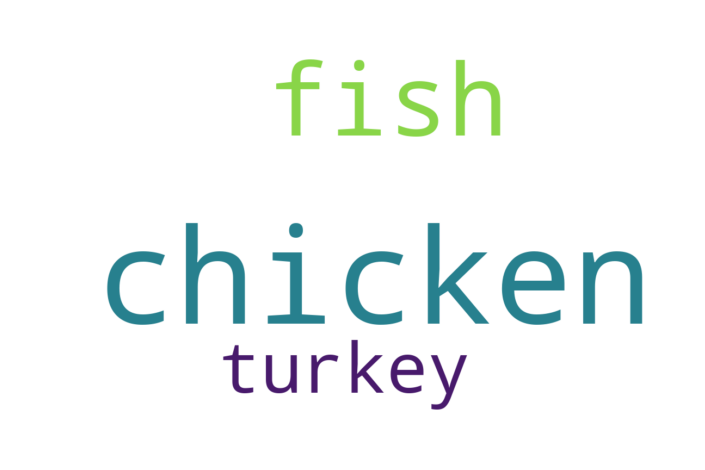

In [268]:
fav_food = {"chicken":10,"fish":5,"turkey":2}
generateWordCloud(fav_food)